In [19]:
#Import all the necessary modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
#importing seaborn for statistical plots
import seaborn as sns

In [20]:
bankdf.shape

(45211, 17)

In [21]:
bankdf = pd.read_csv('bank-full.csv')

In [22]:
bankdf.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [23]:
bankdf.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [24]:
bankdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


`Columns and Types Analysis`
Target - has the client subscribed a term deposit? (binary: 'yes','no')
`Continous`:age,balance,duration.
`Categorical`:job,marital,education
`Binary Categorical('yes','no')`:default,housing,loan
`Contact and Related columns`:contact,month,day,duration
`Other`:campaign,pdays,previous,poutcome

In [25]:
bankdf.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


`Insights:
Contact seems to be empty for many entrires.
Education has some missing values.
Pout also has many "unknown" value.`

`Categorical:`
Job
Marital
Education
Default
Housing
Loan
Contact
month
poutcome
Target

`Continous:`
Age
previous
campaign
duration
day
balance 
age

In [26]:
for i in list(bankdf.columns[bankdf.dtypes=='int64']):   # checking value counts of all integer type columns
    print(i,":")
    print("************************")
    print((bankdf[[i]]==0).sum())
    print("------------------------")

age :
************************
age    0
dtype: int64
------------------------
balance :
************************
balance    3514
dtype: int64
------------------------
day :
************************
day    0
dtype: int64
------------------------
duration :
************************
duration    3
dtype: int64
------------------------
campaign :
************************
campaign    0
dtype: int64
------------------------
pdays :
************************
pdays    0
dtype: int64
------------------------
previous :
************************
previous    36954
dtype: int64
------------------------


`Balance:` 3514 members have 0.
`Previous:` has 36954 entries as 0

In [28]:
for i in list(bankdf.columns[bankdf.dtypes=='object']):   # checking value counts of all object type columns
    print(i,":")
    print("************************")
    print(bankdf[i].value_counts())
    print("------------------------")

job :
************************
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
------------------------
marital :
************************
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
------------------------
education :
************************
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
------------------------
default :
************************
no     44396
yes      815
Name: default, dtype: int64
------------------------
housing :
************************
yes    25130
no     20081
Name: housing, dtype: int64
------------------------
loan :
************************
no     37967
yes     7244
Name: loan, dtype: int64
------------------------
contact :


education,job,poutcome,contact  have "Unknown" category.

Avg Age : 41 . (age ranging from 18 to 95)
Avg balance is 1363 with the minimum of negative balance.

In [29]:
bankdf.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

yyaaay No null values.
But since most of the data is categorical values need to watchout for missing/unknown values.

## Univariate Analysis

### loan

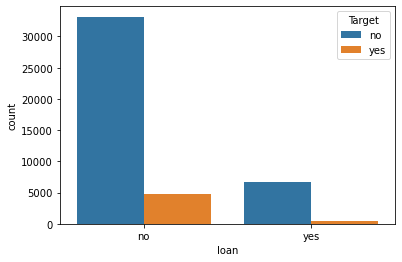

In [30]:
sns.countplot(x="loan", data=bankdf,hue = "Target")

### Education

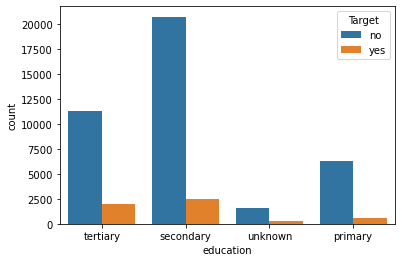

In [31]:
sns.countplot(x="education", data=bankdf,hue = "Target") 

### Marital

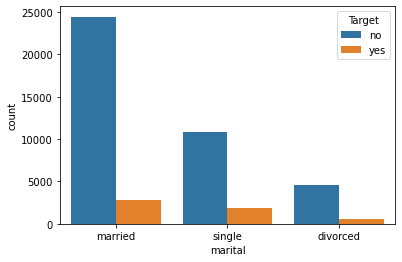

In [32]:
sns.countplot(bankdf["marital"],data=bankdf,hue = "Target")

huge number of married people dont have deposit(they could be potential customers who should be approached during campaign)

## Bivariate Analysis

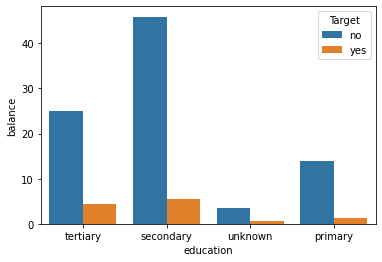

In [33]:
sns.barplot(x="education", y="balance", hue="Target", data=bankdf, estimator=lambda x: len(x) / len(bankdf) * 100)
plt.show()

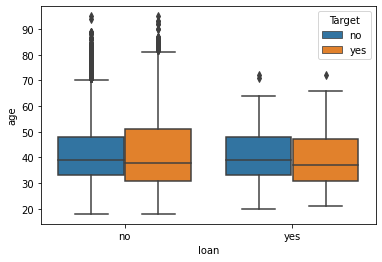

In [34]:
sns.boxplot(data=bankdf,x='loan', y='age',hue="Target")

people age 30-50 who dont have previous loan have deposited
people age 30-45 who have previous loan have deposited

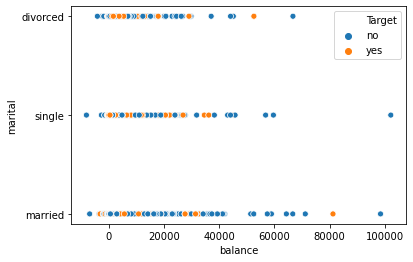

In [35]:
sns.scatterplot(data=bankdf, y="marital", x="balance",hue="Target")

Its evident that Single and Married have high balance

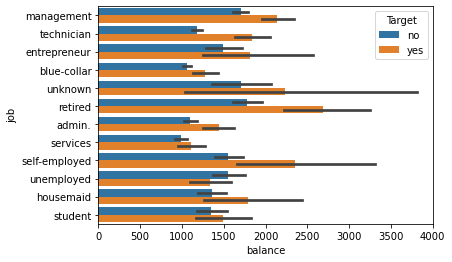

In [36]:
sns.barplot(data=bankdf,y="job", x="balance", hue="Target")

Mgmt., retired and self employed have high balance in those who dont have deposit.

Retired,MAnagement have good balance and retired people seem to have taken deposits.
next highest being Management

#Insights:
` Marital,job,Education and Loan have significant effect on the balance amount. `

In [40]:
#dropping customers who have 0 balance.
remove = (bankdf['education']=="unknown")
bankdf.drop(bankdf[remove].index, axis = 0, inplace = True)

In [41]:
bankdf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


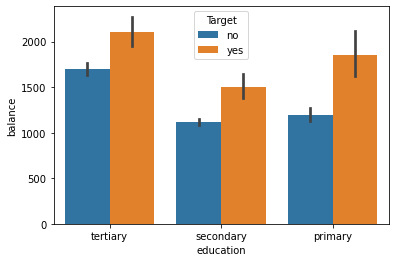

In [42]:
sns.barplot(data=bankdf,x="education", y="balance", hue="Target")

Insight:
    People from unknown education category have made deposit.
    (Need further anaysis on this unknown category).


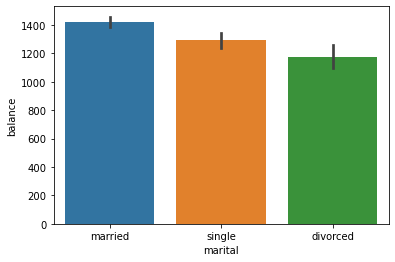

In [43]:
sns.barplot(data=bankdf,x="marital", y="balance")

Married people have highest balance and most of them have opted to deposit.


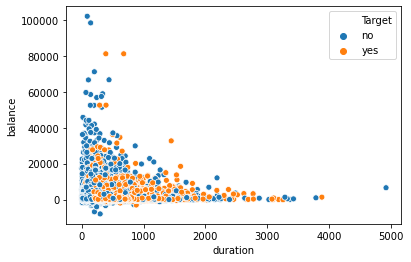

In [44]:
sns.scatterplot(data=bankdf,x='duration',y='balance',hue="Target")
#bankdf["marital"].value_counts()

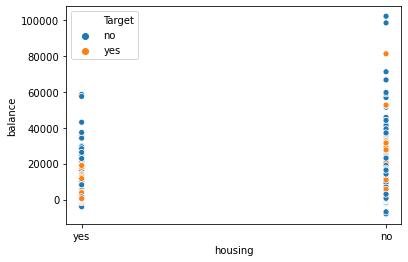

In [45]:
sns.scatterplot(data=bankdf,x="housing",y="balance",hue="Target")
#People with no housing have good balance.

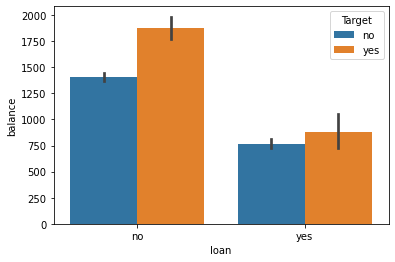

In [46]:
sns.barplot(data=bankdf,x='loan',y='balance',hue="Target")

In [47]:
People who have had previous loan have significant effect on the Balance.
having a personal loan is an important feature

SyntaxError: invalid syntax (<ipython-input-47-484b11cc1e9c>, line 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11881a940>,
      dtype=object)

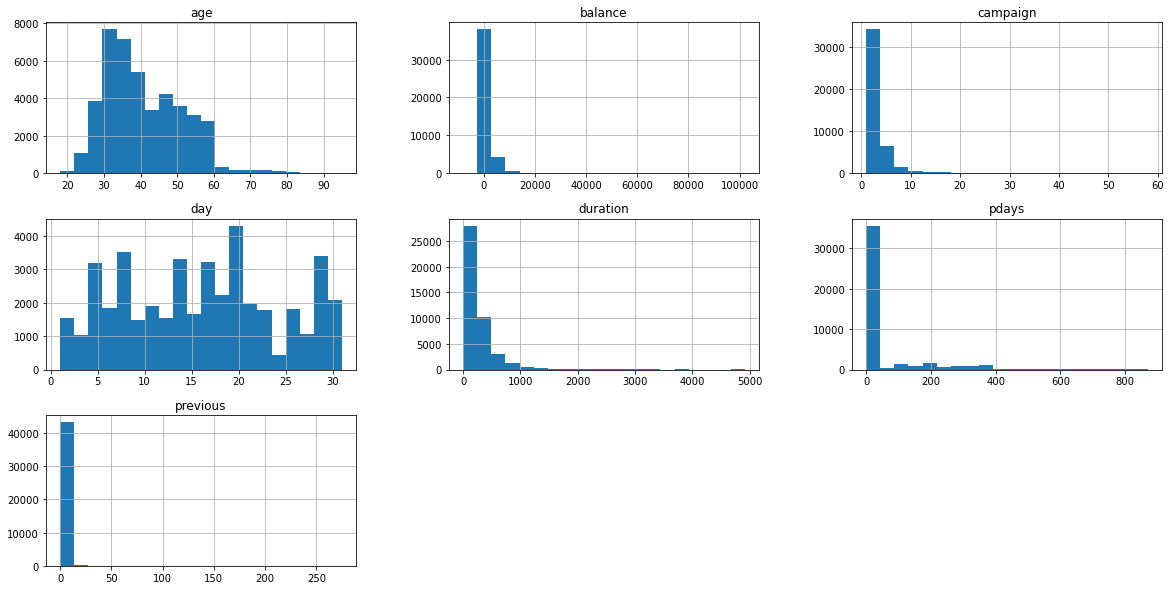

In [48]:
bankdf.hist(bins=20, figsize=(20,10))

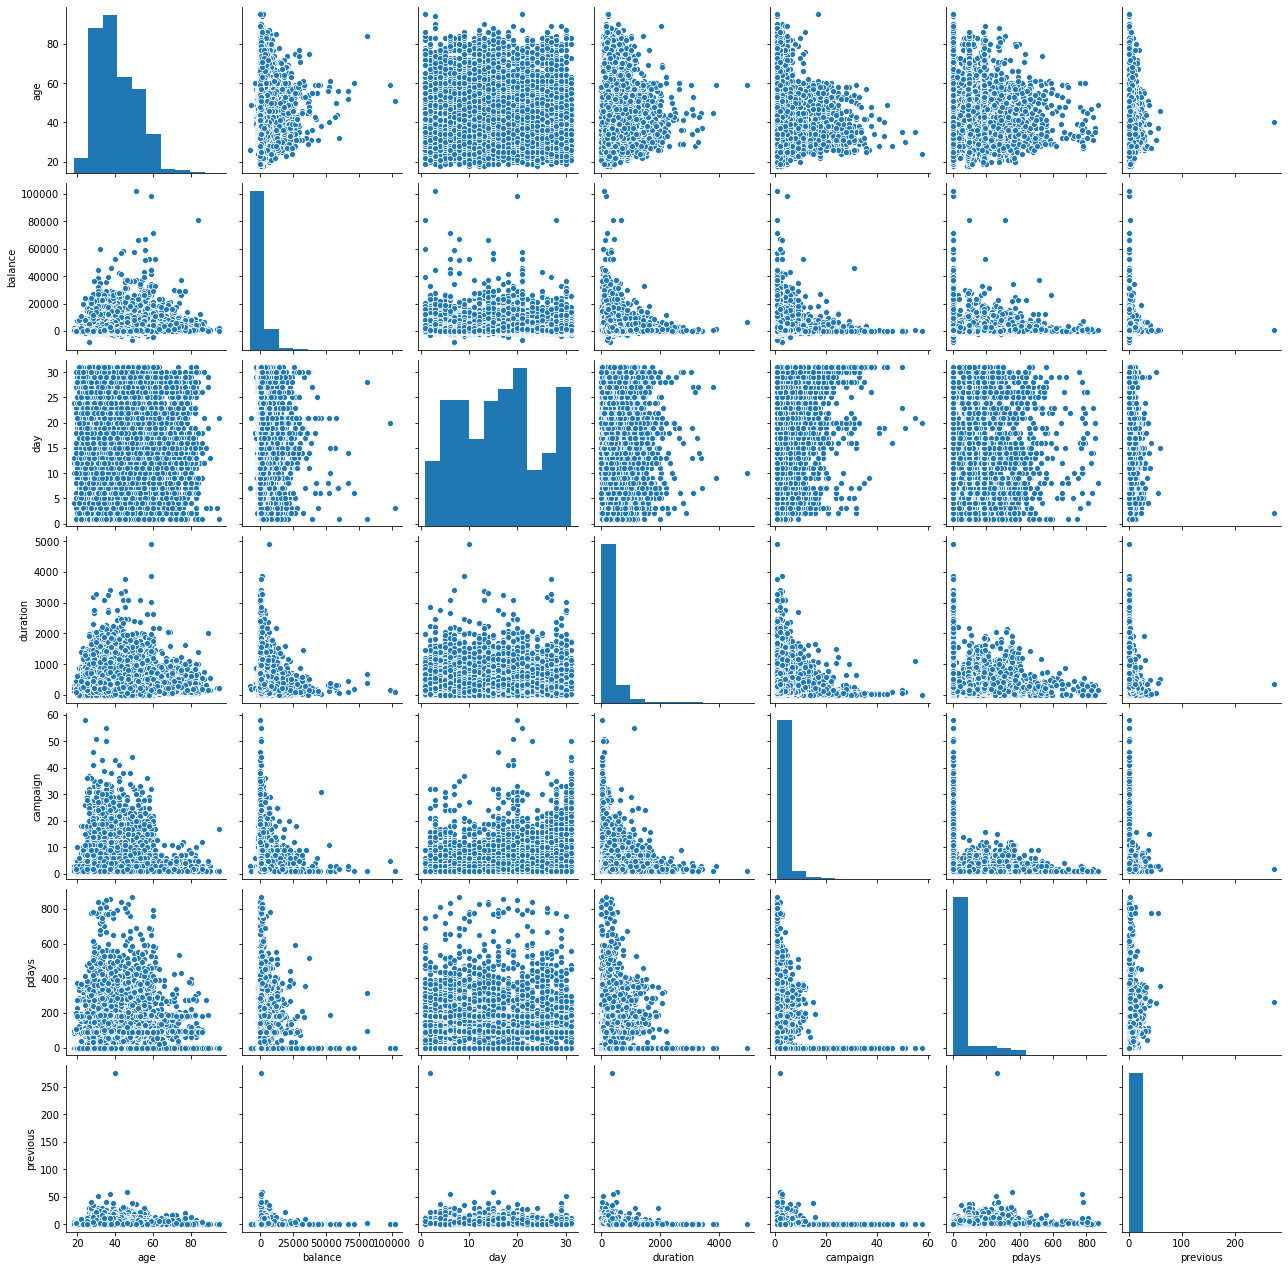

In [49]:
sns.pairplot(bankdf)

In [50]:
tr=bankdf.groupby(['job'])['balance'].count()
tr.sort_index(ascending=True)
print(tr)

job
admin.           5000
blue-collar      9278
entrepreneur     1411
housemaid        1195
management       9216
retired          2145
self-employed    1540
services         4004
student           775
technician       7355
unemployed       1274
unknown           161
Name: balance, dtype: int64


Most people are in blue-collar job.

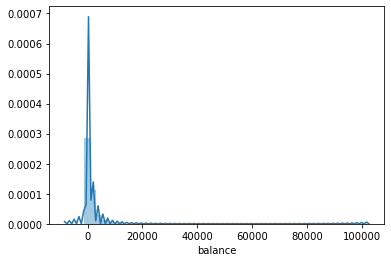

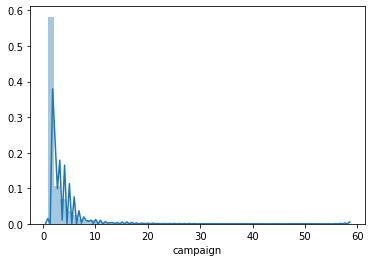

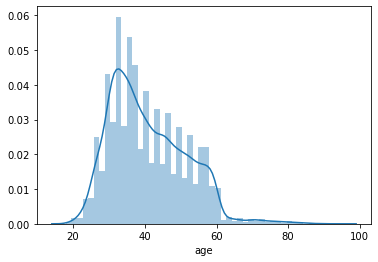

In [51]:
# distplot for continous columns

for i in ["balance","campaign","age"]:
    sns.distplot(bankdf[i],kde=True)
    plt.show()

In [52]:
#"housing"
bankdf['housing'] = bankdf['housing'].replace(['yes'],'1')
bankdf['housing'] = bankdf['housing'].replace(['no'],'0')

In [53]:
#bankdf.groupby(['job','education','marital',"loan",'Target'])['balance'].count()
#Since most of the data are categorical. Replacing with numerical values 
#replace "yes","no"  with "1,0".
#"loan"
bankdf['loan'] = bankdf['loan'].replace(['yes'],'1')
bankdf['loan'] = bankdf['loan'].replace(['no'],'0')
#"default"
bankdf['default'] = bankdf['default'].replace(['yes'],'1')
bankdf['default'] = bankdf['default'].replace(['no'],'0')

#"Target"
bankdf['Target'] = bankdf['Target'].replace(['yes'],'1')
bankdf['Target'] = bankdf['Target'].replace(['no'],'0')

In [54]:
#education :
#************************
#secondary    2
#tertiary     3
#primary      1
#unknown     -1
bankdf['education'] = bankdf['education'].replace(['primary'],'1')
bankdf['education'] = bankdf['education'].replace(['secondary'],'2')
bankdf['education'] = bankdf['education'].replace(['tertiary'],'3')

In [55]:
#month
bankdf['month'] = bankdf['month'].replace(['jan'],'1')
bankdf['month'] = bankdf['month'].replace(['feb'],'2')
bankdf['month'] = bankdf['month'].replace(['mar'],'3')
bankdf['month'] = bankdf['month'].replace(['apr'],'4')
bankdf['month'] = bankdf['month'].replace(['may'],'5')
bankdf['month'] = bankdf['month'].replace(['jun'],'6')
bankdf['month'] = bankdf['month'].replace(['jul'],'7')
bankdf['month'] = bankdf['month'].replace(['aug'],'8')
bankdf['month'] = bankdf['month'].replace(['sep'],'9')
bankdf['month'] = bankdf['month'].replace(['oct'],'10')
bankdf['month'] = bankdf['month'].replace(['nov'],'12')
bankdf['month'] = bankdf['month'].replace(['dec'],'13')

In [56]:
#job
bankdf['job'] = bankdf['job'].replace(['unknown'],'-1')
bankdf['job'] = bankdf['job'].replace(['unemployed'],'0')
bankdf['job'] = bankdf['job'].replace(['admin'],'1')
bankdf['job'] = bankdf['job'].replace(['blue-collar'],'2')
bankdf['job'] = bankdf['job'].replace(['entrepreneur'],'3')
bankdf['job'] = bankdf['job'].replace(['housemaid'],'4')
bankdf['job'] = bankdf['job'].replace(['management'],'5')
bankdf['job'] = bankdf['job'].replace(['retired'],'6')
bankdf['job'] = bankdf['job'].replace(['self-employed'],'7')
bankdf['job'] = bankdf['job'].replace(['services'],'8')
bankdf['job'] = bankdf['job'].replace(['student'],'9')
bankdf['job'] = bankdf['job'].replace(['technician'],'10')

In [57]:
#marital
bankdf['marital'] = bankdf['marital'].replace(['single'],'1')
bankdf['marital'] = bankdf['marital'].replace(['married'],'2')
bankdf['marital'] = bankdf['marital'].replace(['divorced'],'3')

In [58]:
#contact :
bankdf['contact'] = bankdf['contact'].replace(['unknown'],'-1')
bankdf['contact'] = bankdf['contact'].replace(['cellular'],'1')
bankdf['contact'] = bankdf['contact'].replace(['telephone'],'2')

In [59]:
#poutcome :
bankdf['poutcome'] = bankdf['poutcome'].replace(['unknown'],'-1')
bankdf['poutcome'] = bankdf['poutcome'].replace(['success'],'1')
bankdf['poutcome'] = bankdf['poutcome'].replace(['failure'],'0')
bankdf['poutcome'] = bankdf['poutcome'].replace(['other'],'2')

In [85]:
bankdf['job'] = bankdf['job'].replace(['admin.'],'1')
print(bankdf.loc[bankdf["job"] == "admin."])

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, Target]
Index: []


In [86]:
bankdf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,5,2,3,0,2143,1,0,-1,5,5,261,1,-1,0,-1,0
1,44,10,1,2,0,29,1,0,-1,5,5,151,1,-1,0,-1,0
2,33,3,2,2,0,2,1,1,-1,5,5,76,1,-1,0,-1,0
5,35,5,2,3,0,231,1,0,-1,5,5,139,1,-1,0,-1,0
6,28,5,1,3,0,447,1,1,-1,5,5,217,1,-1,0,-1,0


age           15.0
balance     1344.0
day           13.0
duration     215.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [float64]

In [73]:
bankdf.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097132,-0.008941,-0.005296,0.004241,-0.023243,0.001175
balance,0.097132,1.000000,0.004229,0.019802,-0.016307,0.003965,0.016503
day,-0.008941,0.004229,1.000000,-0.029727,0.165020,-0.094402,-0.052230
duration,-0.005296,0.019802,-0.029727,1.000000,-0.083275,-0.002051,0.000587
campaign,0.004241,-0.016307,0.165020,-0.083275,1.000000,-0.089131,-0.032659
pdays,-0.023243,0.003965,-0.094402,-0.002051,-0.089131,1.000000,0.453251
previous,0.001175,0.016503,-0.052230,0.000587,-0.032659,0.453251,1.000000


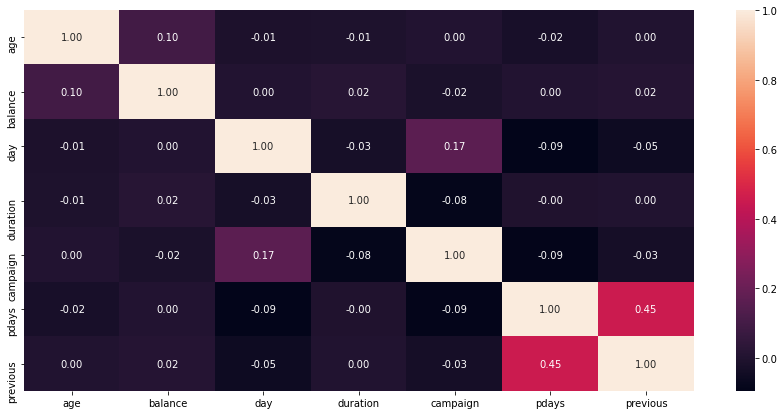

In [43]:
plt.figure(figsize = (15,7))
sns.heatmap(bankdf.corr(),annot=True, fmt='.2f')

# Logistic Regression

In [44]:

#Dataframe
X = bankdf.drop('Target', axis=1)
Y = bankdf['Target']

Split the data into training and test set in the ratio of 70:30 respectively

In [45]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=1)
print('x train data',X_train.shape)
print('y train data',Y_train.shape)
print('x test data',X_test.shape)
print('y test data',Y_test.shape)

x train data (30347, 16)
y train data (30347,)
x test data (13007, 16)
y test data (13007,)


In [46]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=4294967295,fit_intercept=False)
logreg.fit(X_train, Y_train)                    # fit the model on train data
print(logreg , '\n')
y_predict = logreg.predict(X_test)  

LogisticRegression(fit_intercept=False, random_state=4294967295) 



In [50]:
logreg_X_score=logreg.score(X_test,Y_test)
logreg_X_accuracy=accuracy_score(Y_test,y_predict)
print("Model Score:",logreg_X_score)
print("Model Accuracy:",logreg_X_accuracy)
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predict))
print()
print('Confusion Matrix')
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

LR_Training_Accuracy=logreg.score(X_train,Y_train)
print("Trainig accuracy",LR_Training_Accuracy)  
print()
print("Testing accuracy",logreg.score(X_test,Y_test))
print()
print("Roc Auc Score:",roc_auc_score(Y_test,y_predict))

Model Score: 0.8884446836318906
Model Accuracy: 0.8884446836318906
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11515
           1       0.54      0.19      0.28      1492

    accuracy                           0.89     13007
   macro avg       0.72      0.58      0.61     13007
weighted avg       0.86      0.89      0.86     13007


Confusion Matrix
Trainig accuracy 0.8875341878933667

Testing accuracy 0.8884446836318906

Roc Auc Score: 0.5846228081101814


In [51]:
# Observe the predicted and observed classes in a dataframe.
z = X_test.copy()
z['Observed Target'] = Y_test
z['Predicted Target'] = y_predict
z.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Observed Target,Predicted Target
40979,60,6,2,2,0,523,0,0,1,13,8,192,3,-1,0,-1,1,0
22024,59,6,2,1,0,2568,0,0,1,20,8,63,5,-1,0,-1,0,0
42842,53,1,1,2,0,2398,1,0,1,3,2,108,1,92,1,1,0,0
16761,31,8,1,2,0,0,1,0,1,24,7,362,1,-1,0,-1,0,0
41638,61,5,2,3,0,3371,0,0,1,28,9,299,2,-1,0,-1,1,0


In [52]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
12,campaign,0.30
6,housing,0.25
15,poutcome,0.25
8,contact,0.24
14,previous,0.17
2,marital,0.14
3,education,0.12
10,month,0.10
7,loan,0.07
0,age,0.03


##### Important features
Balance,duration,pdays has coefficients value as 0 so these feature doesn't help model in predicting target variable.
Campaign,housing,poutsome,contact are the top features based on the coefficient

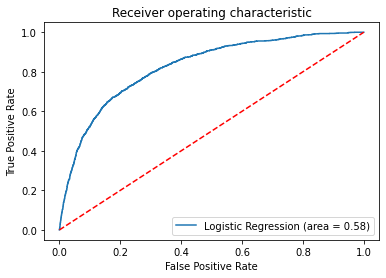

In [53]:
# !pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1],pos_label="1")
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Build Decision Tree Model

In [56]:
from sklearn.tree import DecisionTreeClassifier
# Result map to hold name and score for each model
results = {}

#Init
decisionTreeClassifier = DecisionTreeClassifier(criterion = 'gini', random_state=1)

#fit data
decisionTreeClassifier.fit(X_train, Y_train)

#Predict
dtc_y_pred = decisionTreeClassifier.predict(X_test)

# Model score
dtc_model_score = decisionTreeClassifier.score(X_test , Y_test)

# Accuracy
dtc_model_accuracy = accuracy_score(Y_test, dtc_y_pred)


print("Prediction: {}".format(dtc_y_pred))
print("Score: {}".format(dtc_model_score))
print("Accuracy {}".format(dtc_model_accuracy))
print("Confusion metrix")
print(confusion_matrix(Y_test, dtc_y_pred))
print(classification_report(Y_test,dtc_y_pred))

results['Decision Tree'] = dtc_model_score


Prediction: ['0' '0' '1' ... '0' '1' '0']
Score: 0.8781425386330437
Accuracy 0.8781425386330437
Confusion metrix
[[10690   825]
 [  760   732]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11515
           1       0.47      0.49      0.48      1492

    accuracy                           0.88     13007
   macro avg       0.70      0.71      0.71     13007
weighted avg       0.88      0.88      0.88     13007



In [57]:
# Time for Classification Models
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
}

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, Y_train, cv=3)
log_reg_mean = log_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf,X_train, Y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, Y_train, cv=3)
rand_mean = rand_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.','Gradient Boost','Decision Tree', 'Random Forest'], 
    'Crossval Mean Scores': [logreg_X_score.mean(), grad_mean, dtc_model_score.mean(), rand_mean]}

result_df = pd.DataFrame(data=d)

In [58]:
# All our models perform well but I will go with GradientBoosting.
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
1,Gradient Boost,0.903549
3,Random Forest,0.901110
0,Logistic Reg.,0.888445
2,Decision Tree,0.878143


In [61]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(grad_clf, X_train, Y_train, cv=3)
grad_clf.fit(X_train, Y_train)
print ("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(Y_train, y_train_pred))

Gradient Boost Classifier accuracy is 0.90


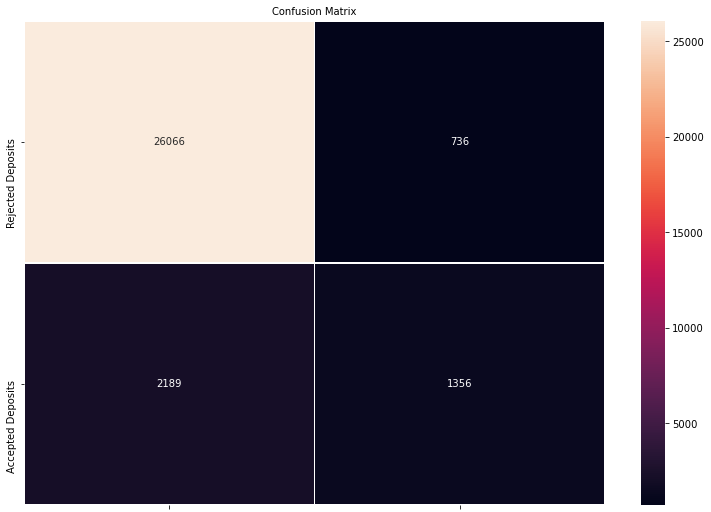

Precision Score:  0.922526986374093
Recall Score:  0.9725393627341243


In [64]:
from sklearn.metrics import confusion_matrix
# 4697: no's, 4232: yes
conf_matrix = confusion_matrix(Y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=10)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Rejected Deposits', 'Accepted Deposits'])
plt.show()
print('Precision Score: ', precision_score(Y_train, y_train_pred,pos_label="0"))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(Y_train, y_train_pred,pos_label="0"))


Its evident that gradient boost has the best score.

#Conclusion

#Age: Next campaign should focus on younger people (<20) and very old people(60 or above)
#job:Retired indivudual have high balance in the account and hence must be well campaigned to subscribe for term deposit.
#Loan:Futur marketing campaign should focus on individuals of medium and high balances which will increase the likelihood of suscribing to a term deposit.
#Housing:Since people having both housing loan and personal loan will affect the balance amount , marketing should concentrate people with either one of the loan or many be no previous loans at all.
By combining all these strategies and simplifying the market audience the next campaign should address, it is likely that the next marketing campaign of the bank will be more effective than the current one.